In [86]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
mat_data = loadmat("B0005.mat")
data = mat_data['B0005']

capacity = []

for row in data[0][0][0][0]:
    if row[0] == ['discharge']:
        capacity.append(row[-1][-1][-1][-1][0][0])
        
print(capacity)

[1.8564874208181574, 1.846327249719927, 1.8353491942234077, 1.8352625275821128, 1.8346455082120419, 1.8356616600675495, 1.8351461429226603, 1.8257567905665537, 1.8247738529891333, 1.824613268496936, 1.8246195526864504, 1.8142019357673917, 1.8137521577549054, 1.8134404914735822, 1.8025980036306504, 1.80210690024615, 1.802579500826209, 1.8030683142834096, 1.8027776247196041, 1.8470259949329193, 1.847417311283644, 1.8361774213478947, 1.8257807475776242, 1.8251136435078368, 1.8255815042203762, 1.8140311275083907, 1.8147691941158939, 1.813969388710352, 1.802765665167823, 1.804077040117352, 1.8518025516704486, 1.8307038456739428, 1.8199041089501267, 1.8093079637028517, 1.80460990458052, 1.7993770651972192, 1.7884432335370462, 1.7829230484252723, 1.7730337158018288, 1.773037755078937, 1.7678721106662054, 1.7623150704093087, 1.7676172924938447, 1.762668359743147, 1.7517304870664143, 1.7418496047960008, 1.7360913511847138, 1.7936240148573608, 1.7831890223273275, 1.7673642076278957, 1.7570177850

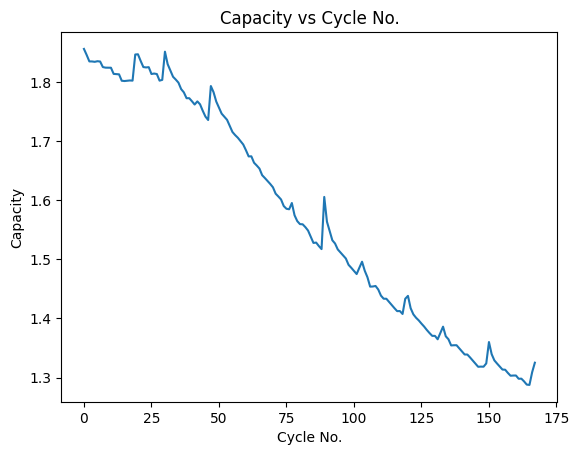

In [87]:
plt.plot(capacity)
plt.xlabel("Cycle No.")
plt.ylabel("Capacity")
plt.title("Capacity vs Cycle No.")
plt.show()

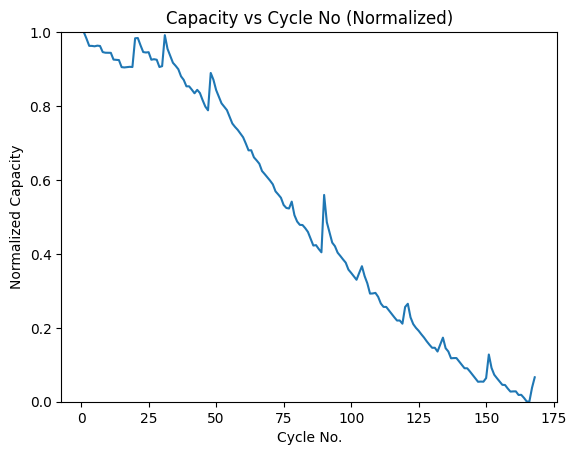

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_capacity = scaler.fit_transform(pd.DataFrame(capacity))

# Get the cycle numbers (x-axis values)
cycle_numbers = range(1, len(capacity) + 1)

# Plot the normalized data
plt.plot(cycle_numbers, normalized_capacity)
plt.xlabel("Cycle No.")
plt.ylabel("Normalized Capacity")
plt.title("Capacity vs Cycle No (Normalized)")
plt.ylim(0, 1)  # Set the y-axis limits to [0, 1]
plt.show()

In [89]:
from scipy.io import loadmat

mat_data = loadmat("B0005.mat")
data = mat_data['B0005']

charge_cycles_with_3_9 = []

for cycle in data[0][0][0][0]:
    cycle_type = cycle[0][0][0][0][0]

    if cycle_type == 'charge':
        voltage_measured = cycle[0][0][1][0][0][0][0]

        if isinstance(voltage_measured, list) and 3.9 in voltage_measured:
            index_of_3_9 = voltage_measured.index(3.9)
            time_values = cycle[0][0][2][0][0][0][0]
            time_at_index = time_values[index_of_3_9]

            charge_cycles_with_3_9.append({
                'Voltage_measured': voltage_measured,
                'Time_at_3_9': time_at_index
            })

print(charge_cycles_with_3_9)







[]


In [90]:
from scipy.io import loadmat

mat_data = loadmat("B0005.mat")
data = mat_data['B0005']

charge_cycles_with_3_9 = []

for cycle in data[0][0][0][0]:
    cycle_type = cycle[0][0][0][0][0]

    if cycle_type == 'charge':
        for subcycle in cycle:
            if subcycle.size > 0 and 'Voltage_measured' in subcycle[0][0]:
                voltage_measured = subcycle[0][0]['Voltage_measured'][0][0][0]
                if isinstance(voltage_measured, list) and 3.9 in voltage_measured:
                    index_of_3_9 = voltage_measured.index(3.9)
                    time_values = subcycle[0][0]['Time'][0][0][0]
                    time_at_index = time_values[index_of_3_9]

                    charge_cycles_with_3_9.append({
                        'Voltage_measured': voltage_measured,
                        'Time_at_3_9': time_at_index
                    })

print(charge_cycles_with_3_9)


[]


In [91]:
#4d array with charge cycles
c=[]
for row in data[0][0][0][0]:    
    if(row[0]==['charge']):
        charge=row[-1]
        c.extend(charge)
print(c)

[array([(array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
               4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
               4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
               4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
               4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
               4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
               4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
               4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
               4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
               4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
               4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
               4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
               4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
               4.123763

In [92]:
# 3d array with elements in the charge cyles

sub_item=[]
for c_item in c:
    for sub_item in c_item:
        print(sub_item)

(array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
        4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
        4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
        4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
        4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
        4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
        4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
        4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
        4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
        4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
        4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
        4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
        4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
        4.12376399, 4.12442084, 4.12507381, 4.12567826, 4.12616805,
        4.12656627, 4.12731238, 4.12808141, 4.1


(array([[3.32505466, 3.00195057, 3.43464432, 3.45485712, 3.46878816,
        3.48095406, 3.4919311 , 3.50185109, 3.51143742, 3.52041057,
        3.52910035, 3.53738006, 3.54539579, 3.55303458, 3.56005984,
        3.56732548, 3.57404323, 3.58058903, 3.58700797, 3.5932613 ,
        3.59935588, 3.605096  , 3.61158233, 3.61698343, 3.62235041,
        3.62772858, 3.63328253, 3.63830795, 3.64346635, 3.64822097,
        3.65308849, 3.65800581, 3.66274337, 3.66733744, 3.67174706,
        3.67613415, 3.68043126, 3.68476599, 3.68903239, 3.6929462 ,
        3.69705845, 3.70085476, 3.70493604, 3.70911143, 3.71260302,
        3.7164449 , 3.72011073, 3.72362217, 3.7270951 , 3.73077399,
        3.73439805, 3.73752011, 3.74071808, 3.74395121, 3.74752109,
        3.75060173, 3.75388959, 3.75686761, 3.76034278, 3.76330013,
        3.7661159 , 3.7693452 , 3.77243596, 3.77533242, 3.77795615,
        3.78080497, 3.78389986, 3.78623236, 3.78918478, 3.79182332,
        3.79451856, 3.79719438, 3.79984682, 3.

In [93]:
#2d array for votage_measured values

f_item=[]
fc_item=[]
for c_item in c:
    for v_item in c_item:
        if len(v_item)>0:
            f_item.append(v_item[0])
            fc_item.append(v_item[1])

print(f_item)

[array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
        4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
        4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
        4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
        4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
        4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
        4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
        4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
        4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
        4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
        4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
        4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
        4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
        4.12376399, 4.12442084, 4.12507381, 4.12567826, 4.12616805,
        4.12656627, 4.12731238, 4.12808141, 4.1

In [94]:
for roww in f_item:
    for ele in roww:
        print(ele,end=" ")
    print()

[3.87301722 3.47939356 4.00058782 4.01239519 4.01970806 4.02540947
 4.03063627 4.03534896 4.03971637 4.04354121 4.04672407 4.05032083
 4.05347776 4.05687947 4.06020401 4.06309148 4.06606364 4.06810568
 4.07091089 4.07314062 4.07531198 4.07798651 4.07976022 4.08180212
 4.08379322 4.08535888 4.08707793 4.0888699  4.08991841 4.09204117
 4.09327341 4.09462341 4.09636787 4.09755211 4.09852259 4.09990153
 4.10107397 4.10186053 4.10303834 4.10433761 4.10518719 4.10617751
 4.10713402 4.108074   4.10876115 4.10971157 4.11073785 4.1115377
 4.11216994 4.11307997 4.11363282 4.114555   4.11540239 4.115793
 4.11674636 4.117245   4.11794271 4.1186426  4.11943651 4.12004755
 4.12062053 4.12120233 4.12214376 4.12223722 4.12330381 4.12376399
 4.12442084 4.12507381 4.12567826 4.12616805 4.12656627 4.12731238
 4.12808141 4.12845744 4.12895829 4.12946203 4.13002418 4.13053061
 4.13123541 4.13183215 4.13231609 4.1328077  4.13349746 4.13410548
 4.13446612 4.13522207 4.13578465 4.13639026 4.13682957 4.1372518

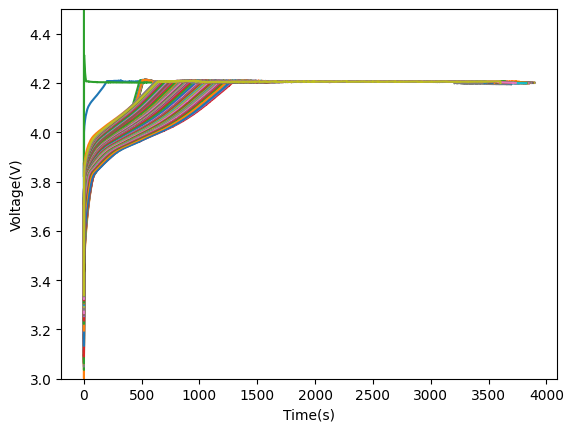

In [95]:
#Voltage Time Graph 
for i in range(0,169):
    plt.plot(f_item[i][0])
plt.xlabel('Time(s)')
plt.ylabel('Voltage(V)')
plt.ylim(3.0,4.5)
plt.show()

In [96]:
#1d array for volatge measuered values
volts = []
for roww in f_item:
    for ele in roww:
        for volt in ele:
            if volt > 3.9000 and volt <= 4.1000:
                volts.append(volt)
                break
print(volts)

[4.000587822429767, 3.9007588667654387, 3.900643205508505, 3.9002548758821796, 3.900203375559534, 3.9000264752817806, 3.9002949807672316, 3.9005887017918646, 3.9006336069384533, 3.900241482592973, 3.900879483423427, 3.900449839192877, 3.9003500731650855, 3.900061236396056, 3.900678893742094, 3.9006101324155065, 3.9002248284280854, 3.9000575484303397, 3.9005504908906734, 3.9005905312661624, 3.900610739441513, 3.900620905048134, 3.900134520398795, 3.9006309621712463, 3.9005233214136115, 3.9000266244423667, 3.900347483347822, 3.9008110264902687, 3.9000567512767255, 3.9000990701574225, 3.90085340233948, 3.90013672082335, 3.900375856615844, 3.9003983643072306, 3.900250840035201, 3.9002158881772933, 3.9000938754026806, 3.900842579493618, 3.900096022136908, 3.9002996098835574, 3.9002253213928024, 3.9002963935819808, 3.900513738118209, 3.900232279773465, 3.9007116653784975, 3.900029288797929, 3.9002307937926286, 3.9003953158800906, 3.900696448766391, 3.900324739129843, 3.9000629305645305, 3.90

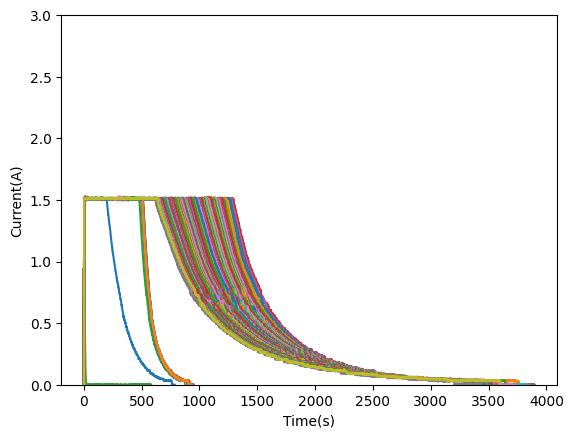

In [97]:
#Current Time Graph 
for i in range(0,169):
    plt.plot(fc_item[i][0])
plt.xlabel('Time(s)')
plt.ylabel('Current(A)')
plt.ylim(0,3.0)
plt.show()

In [98]:
indexes = []
for roww in f_item:
    for ele in roww:
        n = 0
        for volt in ele:
            if volt > 3.9000 and volt <= 4.1000:
                indexes.append(n + 1)
                break
            n = n + 1
print(indexes)

[3, 180, 183, 182, 184, 185, 187, 189, 187, 188, 189, 190, 143, 187, 189, 189, 184, 184, 186, 187, 132, 179, 181, 176, 172, 171, 172, 167, 167, 167, 163, 159, 239, 229, 218, 208, 205, 204, 194, 189, 181, 184, 185, 180, 170, 177, 169, 162, 142, 239, 213, 196, 186, 176, 174, 170, 161, 154, 148, 148, 144, 141, 135, 126, 130, 130, 120, 118, 112, 110, 108, 106, 104, 98, 97, 95, 89, 88, 71, 92, 83, 78, 79, 81, 80, 78, 73, 69, 71, 71, 63, 89, 83, 76, 74, 71, 69, 67, 67, 63, 62, 60, 59, 45, 67, 63, 59, 57, 54, 56, 55, 51, 50, 51, 50, 48, 46, 45, 47, 46, 45, 54, 48, 44, 43, 42, 41, 40, 39, 38, 37, 37, 36, 28, 52, 38, 37, 34, 35, 36, 34, 33, 32, 33, 32, 31, 29, 28, 29, 29, 15, 36, 32, 30, 29, 28, 28, 28, 27, 26, 27, 27, 26, 26, 26, 25, 25, 22]


In [99]:
t_item=[]
for c_item in c:
    for v_item in c_item:
        if len(v_item)>0:
            t_item.append(v_item[5])

print(t_item)

[array([[0.000000e+00, 2.532000e+00, 5.500000e+00, 8.344000e+00,
        1.112500e+01, 1.389100e+01, 1.667200e+01, 1.950000e+01,
        2.228200e+01, 2.506300e+01, 2.782800e+01, 3.064100e+01,
        3.345300e+01, 3.621900e+01, 3.973500e+01, 4.257800e+01,
        4.543800e+01, 4.829700e+01, 5.118800e+01, 5.404700e+01,
        5.692200e+01, 5.979700e+01, 6.268800e+01, 6.565700e+01,
        6.854700e+01, 7.145300e+01, 7.434400e+01, 7.723500e+01,
        8.018800e+01, 8.317200e+01, 8.609400e+01, 8.901600e+01,
        9.192200e+01, 9.490700e+01, 9.784400e+01, 1.007660e+02,
        1.037500e+02, 1.067030e+02, 1.096410e+02, 1.126410e+02,
        1.155940e+02, 1.185470e+02, 1.215320e+02, 1.245000e+02,
        1.275320e+02, 1.305160e+02, 1.335630e+02, 1.365630e+02,
        1.395630e+02, 1.425630e+02, 1.455940e+02, 1.485780e+02,
        1.516100e+02, 1.546720e+02, 1.577350e+02, 1.607820e+02,
        1.638440e+02, 1.669220e+02, 1.700320e+02, 1.731100e+02,
        1.761880e+02, 1.792660e+02, 1.8

In [100]:
times = []
idx = 0
for roww in t_item:
    for ele in roww:
        n = 1
        for time in ele:
            if idx < len(indexes) and n == indexes[idx]:
                times.append(time)
                break 
            n = n + 1
        idx = idx + 1

print(times)

[5.5, 619.234, 632.547, 627.515, 636.406, 641.578, 651.766, 660.5, 650.547, 655.594, 660.094, 665.141, 462.047, 651.75, 660.172, 660.61, 636.656, 636.812, 645.704, 650.703, 419.234, 615.344, 624.406, 602.844, 583.953, 579.953, 584.64, 562.453, 563.125, 562.594, 545.313, 526.047, 691.328, 572.344, 545.047, 519.375, 512.313, 509.969, 484.407, 471.609, 451.484, 459.438, 461.156, 449.203, 424.984, 442.062, 422.032, 404.406, 354.203, 598.328, 532.719, 489.438, 464.891, 439.171, 434.781, 424.531, 401.547, 384.625, 369.0, 369.218, 359.375, 351.453, 336.781, 314.109, 324.5, 324.14, 298.969, 294.172, 278.437, 273.75, 269.25, 264.062, 258.875, 243.5, 241.063, 235.906, 220.797, 218.407, 175.766, 228.344, 205.797, 193.781, 196.172, 200.985, 198.344, 193.094, 180.515, 170.90699999999998, 175.687, 175.719, 155.375, 221.031, 205.51600000000002, 188.359, 183.235, 176.078, 170.265, 165.703, 166.25, 155.407, 152.968, 147.766, 145.531, 110.64, 165.312, 155.469, 145.265, 140.469, 133.187, 138.015, 135.437

In [101]:
indexes = []
for roww in f_item:
    for ele in roww:
        n = 0
        for volt in ele:
            if volt > 4.2000 and volt <= 4.2999:
                indexes.append(n + 1)
                break
            n = n + 1
print(indexes)

[191, 506, 506, 505, 505, 505, 505, 506, 504, 504, 504, 504, 478, 502, 502, 502, 500, 499, 499, 499, 496, 510, 510, 506, 504, 504, 503, 500, 500, 500, 497, 500, 6, 1282, 1268, 1253, 1238, 1234, 1229, 1215, 1206, 1194, 1195, 1191, 1184, 1193, 1181, 1167, 1155, 1161, 1253, 1223, 1200, 1185, 1169, 1164, 1157, 1143, 1130, 1120, 1117, 1109, 1100, 1087, 1074, 1076, 1068, 1054, 1046, 1033, 1027, 1019, 1012, 1004, 991, 984, 976, 963, 955, 947, 963, 938, 925, 920, 924, 917, 908, 893, 883, 885, 879, 910, 935, 916, 898, 888, 876, 870, 863, 856, 845, 839, 833, 825, 825, 851, 834, 820, 811, 802, 804, 799, 783, 778, 779, 775, 767, 759, 753, 754, 752, 783, 785, 762, 748, 741, 734, 729, 723, 715, 709, 706, 702, 696, 701, 733, 705, 697, 687, 690, 689, 679, 670, 665, 668, 661, 654, 645, 642, 644, 642, 621, 688, 669, 656, 648, 643, 637, 634, 629, 625, 625, 623, 618, 617, 612, 608, 607, 626, 5]


In [102]:
indexes = []
for roww in f_item:
    for ele in roww:
        n = 0
        for volt in ele:
            if volt > 4.2000 and volt <= 4.2999:
                indexes.append(n + 1)
                break
            n = n + 1
print(indexes)

[191, 506, 506, 505, 505, 505, 505, 506, 504, 504, 504, 504, 478, 502, 502, 502, 500, 499, 499, 499, 496, 510, 510, 506, 504, 504, 503, 500, 500, 500, 497, 500, 6, 1282, 1268, 1253, 1238, 1234, 1229, 1215, 1206, 1194, 1195, 1191, 1184, 1193, 1181, 1167, 1155, 1161, 1253, 1223, 1200, 1185, 1169, 1164, 1157, 1143, 1130, 1120, 1117, 1109, 1100, 1087, 1074, 1076, 1068, 1054, 1046, 1033, 1027, 1019, 1012, 1004, 991, 984, 976, 963, 955, 947, 963, 938, 925, 920, 924, 917, 908, 893, 883, 885, 879, 910, 935, 916, 898, 888, 876, 870, 863, 856, 845, 839, 833, 825, 825, 851, 834, 820, 811, 802, 804, 799, 783, 778, 779, 775, 767, 759, 753, 754, 752, 783, 785, 762, 748, 741, 734, 729, 723, 715, 709, 706, 702, 696, 701, 733, 705, 697, 687, 690, 689, 679, 670, 665, 668, 661, 654, 645, 642, 644, 642, 621, 688, 669, 656, 648, 643, 637, 634, 629, 625, 625, 623, 618, 617, 612, 608, 607, 626, 5]


In [103]:
times1 = []
idx = 0
for roww in t_item:
    for ele in roww:
        n = 1
        for time in ele:
            if idx < len(indexes) and n == indexes[idx]:
                times1.append(time)
                break 
            n = n + 1
        idx = idx + 1

print(times1)

[667.891, 3241.797, 3238.719, 3229.203, 3228.218, 3229.438, 3231.672, 3243.062, 3215.328, 3221.688, 3219.437, 3222.688, 2927.032, 3196.0, 3193.3429999999935, 3195.625, 3171.703, 3162.968, 3164.313, 3161.391, 3132.281, 3299.735, 3304.75, 3262.141, 3235.703, 3238.422, 3229.0, 3193.797, 3194.641, 3195.984, 3161.766, 3173.625, 14.327999999999996, 3219.484, 3186.093, 3149.047, 3112.188, 3102.5, 3087.985, 3054.062, 3031.734, 3001.938, 3003.828, 2995.328, 2979.047, 3001.297, 2970.328, 2936.468, 2908.312, 2923.735, 3149.735, 3075.5, 3018.8439999999973, 2980.953, 2942.875, 2929.656, 2910.891, 2878.6879999999946, 2844.781, 2820.546, 2812.578, 2791.906, 2772.219, 2738.828, 2705.875, 2711.203, 2691.766, 2655.922, 2635.968, 2603.172, 2590.406, 2568.594, 2551.546, 2530.812, 2497.61, 2482.266, 2461.219, 2429.313, 2408.641, 2391.187, 2427.125, 2365.953, 2332.422, 2321.688, 2329.937, 2312.25, 2290.593, 2253.532, 2226.968, 2234.625, 2216.984, 2295.156, 2354.078, 2308.422, 2262.297, 2238.985, 2209.406, 2

In [104]:
print(times)

[5.5, 619.234, 632.547, 627.515, 636.406, 641.578, 651.766, 660.5, 650.547, 655.594, 660.094, 665.141, 462.047, 651.75, 660.172, 660.61, 636.656, 636.812, 645.704, 650.703, 419.234, 615.344, 624.406, 602.844, 583.953, 579.953, 584.64, 562.453, 563.125, 562.594, 545.313, 526.047, 691.328, 572.344, 545.047, 519.375, 512.313, 509.969, 484.407, 471.609, 451.484, 459.438, 461.156, 449.203, 424.984, 442.062, 422.032, 404.406, 354.203, 598.328, 532.719, 489.438, 464.891, 439.171, 434.781, 424.531, 401.547, 384.625, 369.0, 369.218, 359.375, 351.453, 336.781, 314.109, 324.5, 324.14, 298.969, 294.172, 278.437, 273.75, 269.25, 264.062, 258.875, 243.5, 241.063, 235.906, 220.797, 218.407, 175.766, 228.344, 205.797, 193.781, 196.172, 200.985, 198.344, 193.094, 180.515, 170.90699999999998, 175.687, 175.719, 155.375, 221.031, 205.51600000000002, 188.359, 183.235, 176.078, 170.265, 165.703, 166.25, 155.407, 152.968, 147.766, 145.531, 110.64, 165.312, 155.469, 145.265, 140.469, 133.187, 138.015, 135.437

In [105]:
#Difference between 4.2index time value and 3.9index time value 
diff_list=[]
min_l=min(len(times),len(times1))
for i in range(min_l):
    diff_list.append(times1[i]-times[i])

print(diff_list)

[662.391, 2622.563, 2606.172, 2601.688, 2591.812, 2587.86, 2579.906, 2582.562, 2564.781, 2566.094, 2559.343, 2557.547, 2464.985, 2544.25, 2533.1709999999935, 2535.015, 2535.047, 2526.156, 2518.6090000000004, 2510.688, 2713.047, 2684.391, 2680.344, 2659.297, 2651.75, 2658.469, 2644.36, 2631.344, 2631.516, 2633.39, 2616.453, 2647.578, -677.0, 2647.14, 2641.046, 2629.672, 2599.875, 2592.531, 2603.578, 2582.453, 2580.25, 2542.5, 2542.672, 2546.125, 2554.063, 2559.235, 2548.296, 2532.062, 2554.109, 2325.407, 2617.016, 2586.062, 2553.9529999999972, 2541.782, 2508.094, 2505.125, 2509.344, 2494.0629999999946, 2475.781, 2451.328, 2453.203, 2440.453, 2435.438, 2424.719, 2381.375, 2387.063, 2392.797, 2361.75, 2357.531, 2329.422, 2321.156, 2304.532, 2292.671, 2287.312, 2256.547, 2246.36, 2240.422, 2210.906, 2232.875, 2162.843, 2221.328, 2172.172, 2136.25, 2120.703, 2131.593, 2119.156, 2110.078, 2082.625, 2051.281, 2058.906, 2061.609, 2074.125, 2148.562, 2120.063, 2079.062, 2062.907, 2039.141, 2028

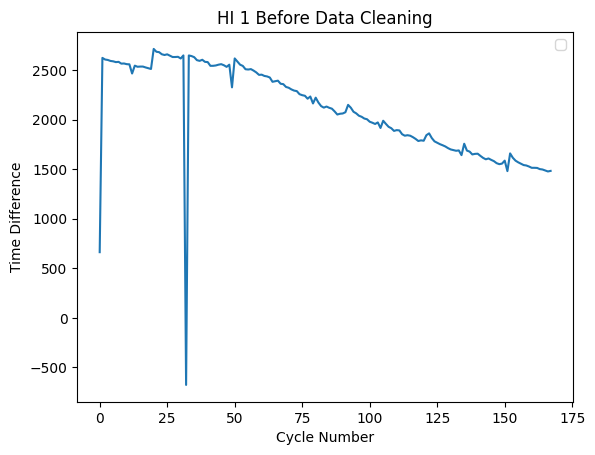

In [106]:
plt.xlabel("Cycle Number")
plt.ylabel("Time Difference")
plt.title("HI 1 Before Data Cleaning")
plt.legend("B0006")
plt.plot(diff_list)

In [107]:
#Time value after 500 seconds 
time_500=[]
for i in range(len(times)):
    updated=times[i]+500
    time_500.append(updated)

print(time_500)

[505.5, 1119.234, 1132.547, 1127.5149999999999, 1136.406, 1141.578, 1151.766, 1160.5, 1150.547, 1155.594, 1160.094, 1165.141, 962.047, 1151.75, 1160.172, 1160.6100000000001, 1136.656, 1136.812, 1145.704, 1150.703, 919.2339999999999, 1115.344, 1124.406, 1102.844, 1083.953, 1079.953, 1084.6399999999999, 1062.453, 1063.125, 1062.594, 1045.313, 1026.047, 1191.328, 1072.344, 1045.047, 1019.375, 1012.313, 1009.969, 984.4069999999999, 971.6089999999999, 951.4839999999999, 959.438, 961.156, 949.203, 924.9839999999999, 942.062, 922.0319999999999, 904.406, 854.203, 1098.328, 1032.719, 989.438, 964.8910000000001, 939.171, 934.781, 924.531, 901.547, 884.625, 869.0, 869.2180000000001, 859.375, 851.453, 836.781, 814.1089999999999, 824.5, 824.14, 798.969, 794.172, 778.437, 773.75, 769.25, 764.062, 758.875, 743.5, 741.063, 735.906, 720.797, 718.407, 675.766, 728.344, 705.797, 693.781, 696.172, 700.985, 698.344, 693.094, 680.515, 670.9069999999999, 675.687, 675.719, 655.375, 721.031, 705.5160000000001,

In [108]:
#time indexes after 500 seconds 
n_indexes = []
idx = 0
for roww in t_item:
    for ele in roww:
        n = 1
        for time in ele:
            if idx < len(time_500) and time >= time_500[idx]:
                n_indexes.append(n)
                break
            n = n + 1
        idx = idx + 1

print(n_indexes)

[155, 272, 274, 274, 275, 276, 277, 279, 277, 278, 278, 279, 247, 277, 279, 279, 275, 275, 276, 277, 239, 271, 272, 269, 266, 265, 266, 263, 263, 263, 260, 258, 412, 428, 417, 407, 404, 403, 394, 388, 380, 383, 385, 379, 369, 376, 368, 361, 341, 438, 412, 395, 386, 375, 373, 369, 360, 353, 347, 347, 343, 340, 334, 325, 330, 329, 320, 318, 311, 309, 307, 305, 303, 298, 297, 294, 288, 288, 270, 291, 282, 277, 278, 280, 279, 277, 272, 269, 270, 270, 262, 288, 283, 275, 273, 271, 268, 266, 266, 262, 261, 259, 259, 244, 266, 262, 258, 256, 253, 255, 254, 250, 250, 250, 250, 247, 245, 244, 246, 245, 244, 253, 248, 243, 243, 241, 240, 239, 238, 237, 236, 236, 235, 227, 251, 237, 237, 233, 234, 235, 233, 232, 231, 232, 231, 230, 229, 227, 228, 228, 214, 236, 231, 230, 228, 228, 228, 228, 226, 225, 226, 227, 225, 225, 226, 224, 224, 222]


In [109]:
#Voltage values for the above time indexes
volts_1 = []
idx = 0
for roww in f_item:
    for ele in roww:
        n = 1
        for volt in ele:
            if idx < len(n_indexes) and n == n_indexes[idx]:
                volts_1.append(volt)
                break 
            n = n + 1
        idx = idx + 1

print(volts_1)

[4.175054974515076, 3.959390607995064, 3.956906893400339, 3.9565247766137808, 3.955653528986676, 3.9553393170455275, 3.954641387702405, 3.954742436509817, 3.9542432833990633, 3.9544408800767847, 3.9540715868745373, 3.954288952520598, 3.953550974664626, 3.95362567225508, 3.954068452206037, 3.954315274870246, 3.9541872967545864, 3.9543871975299165, 3.954301549282038, 3.954325453776809, 3.959475929702091, 3.95357361320815, 3.9527799304246503, 3.9540142642437046, 3.954011923158673, 3.9539150676181367, 3.954278925350979, 3.9548711275981, 3.9551470663218793, 3.9550944013986875, 3.9552434815426665, 3.957707174057119, 4.202117028431061, 3.9527315542276034, 3.9523957679788646, 3.9527017145852885, 3.95510451043217, 3.9555437185870805, 3.9539490420472125, 3.9551977202750095, 3.9552202755152495, 3.958185361726522, 3.9577009825043103, 3.9558271647223937, 3.9552604518542136, 3.9607397572303853, 3.9564275181987747, 3.9574894066955846, 3.9555615547892184, 3.9815345160413655, 3.9481216183611387, 3.9512

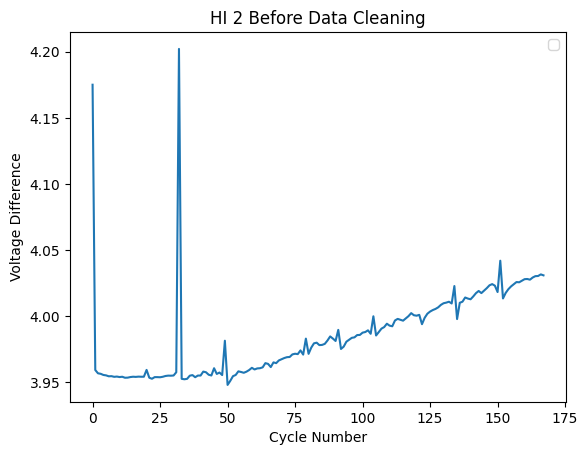

In [110]:
plt.xlabel("Cycle Number")
plt.ylabel("Voltage Difference")
plt.title("HI 2 Before Data Cleaning")
plt.legend("B0005")

plt.plot(volts_1)

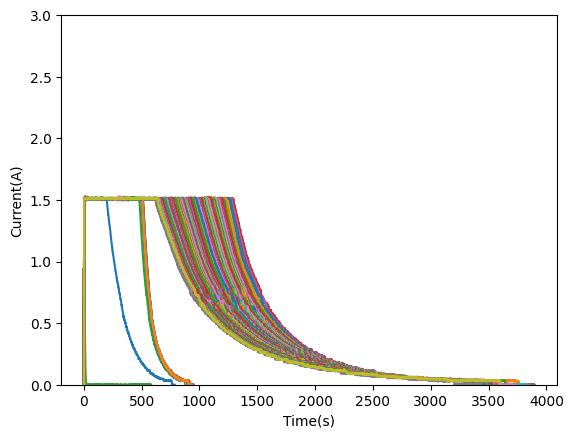

In [111]:
#Current Time Graph 
for i in range(0,169):
    plt.plot(fc_item[i][0])
plt.xlabel('Time(s)')
plt.ylabel('Current(A)')
plt.ylim(0,3.0)
plt.show()

In [112]:
### HI 3
#current values
currs = []
for roww in fc_item:
    for ele in roww:
        for volt in ele:
            if volt>1.4500 and volt <= 1.5000:
                currs.append(volt)
                break
print(currs)

[1.4979819144032747, 1.4867192234230207, 1.4879237833934178, 1.4938580101381282, 1.4906853813848642, 1.490379794275636, 1.494552003933817, 1.493294313750808, 1.490878827358101, 1.4931178257967312, 1.4951969176586772, 1.4933029888853704, 1.4940050822698479, 1.4901964490888038, 1.489402075020317, 1.4995518437684348, 1.4981508293125487, 1.499748990479272, 1.4944079471652139, 1.4990094160082008, 1.495436863103986, 1.4905426884192625, 1.4912692391582607, 1.4970120738511714, 1.4977852901215316, 1.4953192201192251, 1.4956338718962794, 1.4961685765985038, 1.4947106554957608, 1.4853786601348922, 1.499659658707231, 1.488457765157328, 1.4962526379154133, 1.4924863289989154, 1.494134691155313, 1.4987292448453442, 1.4952201622372727, 1.4966860985308552, 1.4995299530070134, 1.4989629829713953, 1.4976303841139034, 1.4944812784257684, 1.4964503567838126, 1.4943579440838621, 1.4941672137943511, 1.4981511073946718, 1.4956559209815665, 1.4974090997724687, 1.4992100048529238, 1.4941782791392884, 1.4981517

In [113]:
#indexes of that current values 
c_indexes = []
for roww in fc_item:
    for ele in roww:
        n = 0
        for volt in ele:
            if volt > 1.4000 and volt < 1.5000:
                c_indexes.append(n + 1)
                break
            n = n + 1
print(c_indexes)

[198, 511, 511, 509, 509, 509, 509, 510, 508, 507, 507, 508, 481, 506, 506, 505, 503, 502, 503, 503, 500, 514, 514, 510, 508, 507, 507, 504, 504, 504, 432, 504, 3, 475, 1283, 1269, 1250, 1248, 1243, 1224, 1220, 1208, 1210, 162, 1199, 1206, 1195, 1183, 1171, 1174, 1266, 1097, 1212, 1199, 1183, 1174, 1169, 1156, 1143, 1134, 1131, 1123, 1113, 883, 331, 1089, 1083, 10, 1062, 1048, 1042, 1034, 1025, 1017, 1007, 999, 991, 978, 970, 962, 979, 956, 941, 930, 37, 928, 920, 908, 898, 901, 893, 925, 948, 929, 914, 903, 891, 887, 880, 873, 863, 853, 848, 838, 840, 866, 847, 833, 825, 816, 820, 813, 429, 794, 792, 792, 269, 770, 767, 768, 765, 798, 344, 775, 761, 18, 746, 739, 740, 729, 725, 722, 718, 711, 718, 748, 722, 712, 97, 705, 703, 694, 685, 682, 79, 677, 669, 661, 657, 661, 658, 634, 700, 682, 667, 663, 658, 652, 649, 645, 640, 640, 639, 631, 631, 627, 624, 622, 642]


In [114]:
#time values corresponding to current indexes
c_times = []
idx1 = 0
for roww in t_item:
    for ele in roww:
        n = 1
        for time in ele:
            if idx1 < len(c_indexes) and n == c_indexes[idx1]:
                c_times.append(time)
                break 
            n = n + 1
        idx1 = idx1 + 1

print(c_times)

[702.5, 3300.703, 3297.562, 3276.156, 3275.125, 3276.547, 3278.735, 3290.078, 3262.063, 3256.844, 3254.547, 3269.719, 2962.11, 3242.328, 3239.7810000000027, 3230.422, 3206.313, 3197.656, 3210.391, 3207.438, 3177.484, 3347.172, 3352.562, 3309.328, 3282.563, 3273.765, 3276.515, 3240.563, 3241.125, 3242.891, 2470.156, 3220.094, 5.296999999999997, 1191.094, 3226.937, 3192.625, 3144.922, 3140.531, 3126.172, 3078.656, 3069.828, 3040.141, 3044.828, 404.203, 3019.906, 3036.719, 3008.594, 2980.031, 2951.937, 2959.235, 3185.188, 2755.25, 3051.8439999999973, 3019.218, 2980.969, 2957.062, 2943.547, 2914.297000000006, 2880.297, 2858.796, 2850.906, 2830.109, 2807.672, 2217.562, 829.188, 2746.703, 2732.672, 22.688000000000002, 2679.703, 2644.063, 2631.234, 2609.437, 2587.062, 2566.375, 2541.282, 2523.219, 2502.11, 2470.266, 2449.625, 2432.281, 2470.734, 2414.922, 2375.859, 2349.0, 90.328, 2342.25, 2323.39, 2294.422, 2267.812, 2278.14, 2255.062, 2336.016, 2389.438, 2343.906, 2305.813, 2279.86, 2250.32

In [115]:
#Time value after 1000 seconds 
time_1000=[]
for i in range(len(c_times)):
    updated1=c_times[i]+1000
    time_1000.append(updated1)

print(time_1000)

[1702.5, 4300.7029999999995, 4297.562, 4276.156, 4275.125, 4276.5470000000005, 4278.735000000001, 4290.0779999999995, 4262.063, 4256.844, 4254.5470000000005, 4269.719, 3962.11, 4242.3279999999995, 4239.781000000003, 4230.4220000000005, 4206.313, 4197.656, 4210.391, 4207.438, 4177.484, 4347.1720000000005, 4352.562, 4309.3279999999995, 4282.563, 4273.764999999999, 4276.514999999999, 4240.563, 4241.125, 4242.891, 3470.156, 4220.094, 1005.297, 2191.094, 4226.937, 4192.625, 4144.9220000000005, 4140.531, 4126.1720000000005, 4078.656, 4069.828, 4040.141, 4044.828, 1404.203, 4019.906, 4036.719, 4008.594, 3980.031, 3951.937, 3959.235, 4185.188, 3755.25, 4051.8439999999973, 4019.218, 3980.969, 3957.062, 3943.547, 3914.297000000006, 3880.297, 3858.796, 3850.906, 3830.109, 3807.672, 3217.562, 1829.188, 3746.703, 3732.672, 1022.688, 3679.703, 3644.063, 3631.234, 3609.437, 3587.062, 3566.375, 3541.282, 3523.219, 3502.11, 3470.266, 3449.625, 3432.281, 3470.734, 3414.922, 3375.859, 3349.0, 1090.328, 3

In [116]:
#time indexes after 1000 seconds 
c_indexes = []
idx2 = 0
for roww in t_item:
    for ele in roww:
        n = 0
        for time in ele:
            if idx2 < len(time_1000) and time >= time_1000[idx2]:
                c_indexes.append(n)
                break
            n = n + 1
        idx2 = idx2 + 1

print(c_indexes)

[342, 587, 587, 585, 585, 585, 585, 586, 585, 583, 584, 584, 562, 583, 583, 582, 580, 579, 580, 580, 578, 590, 589, 586, 585, 584, 584, 581, 581, 581, 522, 582, 347, 873, 1625, 1611, 1593, 1591, 1586, 1568, 1563, 1552, 1554, 560, 1543, 1549, 1539, 1528, 1516, 1518, 1608, 1459, 1556, 1543, 1528, 1519, 1514, 1500, 1488, 1480, 1477, 1469, 1459, 1257, 728, 1436, 1430, 407, 1408, 1396, 1389, 1382, 1373, 1365, 1355, 1348, 1340, 1327, 1319, 1312, 1327, 1305, 1291, 1280, 435, 1277, 1270, 1258, 1249, 1251, 1244, 1276, 1298, 1280, 1265, 1253, 1242, 1238, 1231, 1225, 1215, 1205, 1200, 1191, 1193, 1218, 1200, 1185, 1178, 1169, 1173, 1166, 819, 1147, 1145, 1145, 665, 1124, 1121, 1122, 1119, 1152, 739, 1129, 1115, 416, 1100, 1094, 1094, 1084, 1080, 1076, 1072, 1066, 1073, 1102, 1077, 1067, 494, 1060, 1058, 1048, 1040, 1037, 476, 1032, 1024, 1016, 1013, 1016, 1013, 991, 1054, 1038, 1022, 1018, 1013, 1008, 1005, 1001, 996, 996, 994, 987, 986, 983, 980, 978, 998]


In [117]:
#current values corresponding to indexes after 1000 seconds
currs1 = []
idx3 = 0
for roww in fc_item:
    for ele in roww:
        n = 1
        for time in ele:
            if idx3 < len(c_indexes) and n == c_indexes[idx3]:
                currs1.append(time)
                break 
            n = n + 1
        idx3 = idx3 + 1

print(currs1)

[0.5507129720721501, 0.5644764341068144, 0.5795008166988779, 0.5510862520775203, 0.5819805499887332, 0.5681989245091706, 0.5806501077190623, 0.569880990441063, 0.5682903316845239, 0.6031992706849082, 0.569736514768386, 0.5601546788489635, 0.5689548823075837, 0.5598896737390665, 0.5622718757363496, 0.5939217391502101, 0.5823951780555912, 0.5863016178769705, 0.5619988839961966, 0.5929931813714697, 0.5910180806857931, 0.5500041197515674, 0.5393050206226286, 0.5847950301961015, 0.5575665246959843, 0.5896270970449115, 0.5607111259840332, 0.5657109079988873, 0.5908876861423583, 0.5899880536676582, 1.1731980413870327, 0.5808532691287066, -0.0004353760631331096, 1.510559167831929, 0.5627172128313965, 0.5627292476933408, 0.5803975176525559, 0.5699354398138852, 0.569373382820171, 0.5709512839430105, 0.5718102392314623, 0.5613897827291583, 0.5777415222308746, 1.5105419506043707, 0.5821065740297525, 0.5794177123000475, 0.5844098024060195, 0.5874420379997541, 0.5827934230239452, 0.5874539245961191,

In [118]:
diff_list2=[]
min_l2=min(len(currs1),len(currs))
for i in range(min_l2):
    diff_list2.append(currs[i]-currs1[i])

print(diff_list2)

[0.9472689423311246, 0.9222427893162063, 0.9084229666945399, 0.942771758060608, 0.908704831396131, 0.9221808697664654, 0.9139018962147546, 0.9234133233097449, 0.9225884956735771, 0.889918555111823, 0.9254604028902912, 0.9331483100364069, 0.9250501999622641, 0.9303067753497373, 0.9271301992839673, 0.9056301046182247, 0.9157556512569576, 0.9134473726023015, 0.9324090631690173, 0.9060162346367311, 0.904418782418193, 0.9405385686676951, 0.9519642185356321, 0.91221704365507, 0.9402187654255473, 0.9056921230743137, 0.9349227459122462, 0.9304576685996164, 0.9038229693534025, 0.895390606467234, 0.3264616173201984, 0.9076044960286215, 1.4966880139785463, -0.018072838833013583, 0.9314174783239165, 0.9359999971520034, 0.9148226445847168, 0.92675065871697, 0.9301565701868424, 0.9280116990283848, 0.925820144882441, 0.9330914956966101, 0.918708834552938, -0.016184006520508554, 0.9120606397645986, 0.9187333950946244, 0.911246118575547, 0.9099670617727146, 0.9164165818289786, 0.9067243545431692, 0.936

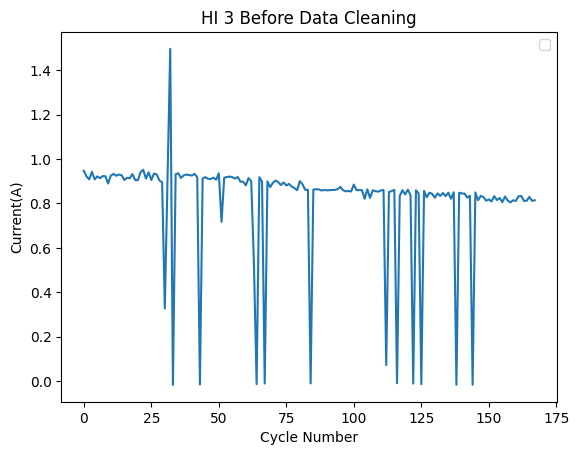

In [119]:
plt.xlabel("Cycle Number")
plt.ylabel("Current(A)")
plt.title("HI 3 Before Data Cleaning")
plt.legend("B0006")

plt.plot(diff_list2)

In [120]:

#data cleaning on HI3
for i in range(len(diff_list2)):
    if diff_list2[i] > 1.0 or diff_list2[i]<0.8:
        diff_list2[i] = 0.9
print(diff_list2) 

[0.9472689423311246, 0.9222427893162063, 0.9084229666945399, 0.942771758060608, 0.908704831396131, 0.9221808697664654, 0.9139018962147546, 0.9234133233097449, 0.9225884956735771, 0.889918555111823, 0.9254604028902912, 0.9331483100364069, 0.9250501999622641, 0.9303067753497373, 0.9271301992839673, 0.9056301046182247, 0.9157556512569576, 0.9134473726023015, 0.9324090631690173, 0.9060162346367311, 0.904418782418193, 0.9405385686676951, 0.9519642185356321, 0.91221704365507, 0.9402187654255473, 0.9056921230743137, 0.9349227459122462, 0.9304576685996164, 0.9038229693534025, 0.895390606467234, 0.9, 0.9076044960286215, 0.9, 0.9, 0.9314174783239165, 0.9359999971520034, 0.9148226445847168, 0.92675065871697, 0.9301565701868424, 0.9280116990283848, 0.925820144882441, 0.9330914956966101, 0.918708834552938, 0.9, 0.9120606397645986, 0.9187333950946244, 0.911246118575547, 0.9099670617727146, 0.9164165818289786, 0.9067243545431692, 0.9361809152295829, 0.9, 0.9166377744023099, 0.9187570978687947, 0.9211

(0.0, 1.5)

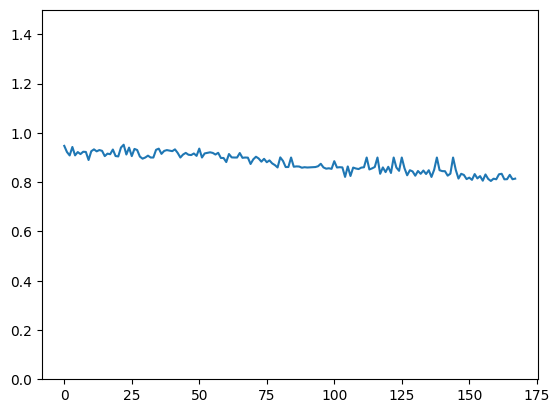

In [121]:
plt.plot(diff_list2)
plt.ylim(0,1.5)

In [122]:
#data cleaning on HI2
for i in range(len(volts_1)):
    if volts_1[i] > 0.15:
        volts_1[i] = 0.07
print(volts_1)  

[0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.0